In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
from folium.plugins import HeatMap 

In [19]:
# Are there more accidents in colder or wormer place?
# which states have the highest umber of accidents, how about per capita?
# Does NewYork shows within the Data , and if yes, why is the count of accidents lower compared to its population?
# among the top 100 cities in the number of accidents , which state do they belon to most frequently?
# what time of the day are accident most frequent in?
# Wich Days of the week are most accidents?
# which month have the most accidents?
# what is the trend of accidnets year over year (increaing / decreasing)?
# what is accident per unit of trffic the highest

In [6]:
# let's open our data

df = pd.read_csv("US_Accidents.csv") 

In [32]:
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [11]:
# pandas count number of numerical columns

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)
len(newdf.columns)

14

In [12]:
df.isnull()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845339,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2845340,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
missig_values = df.isnull().sum().sort_values(ascending=False)
missig_values

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [16]:
missig_values[missig_values != 0]

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
dtype: int64

In [ ]:
# Exploratory and Visualization

# columns to use for analysis

# 'City' / 'Start_Time' / 'Start_Lat'/ 'Start_Lng' / 'Temperature(F)' / 'Weather_Condition'

In [17]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [19]:
cities = df['City'].unique()
len(cities)

11682

In [6]:
df[['City', 'County', 'State', 'Zipcode', 'Country', 'Weather_Condition']] = df[['City', 'County', 'State', 'Zipcode', 'Country', 'Weather_Condition']].astype("category")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     object  
 1   Severity               int64   
 2   Start_Time             object  
 3   End_Time               object  
 4   Start_Lat              float64 
 5   Start_Lng              float64 
 6   End_Lat                float64 
 7   End_Lng                float64 
 8   Distance(mi)           float64 
 9   Description            object  
 10  Number                 float64 
 11  Street                 object  
 12  Side                   object  
 13  City                   category
 14  County                 category
 15  State                  category
 16  Zipcode                category
 17  Country                category
 18  Timezone               object  
 19  Airport_Code           object  
 20  Weather_Timestamp      object  
 21  Temperature(F)         float64 

In [31]:
cities_by_accident = df["City"].value_counts(ascending=False)
cities_by_accident

Miami               106966
Los Angeles          68956
Orlando              54691
Dallas               41979
Houston              39448
                     ...  
Prospect Hill            1
Brooklyn Heights         1
Prosper                  1
Proviso                  1
Dacono                   1
Name: City, Length: 11681, dtype: int64

In [46]:
one_accident_cities = cities_by_accident[cities_by_accident == 1]
one_accident_cities

Beersheba Springs      1
District 6 Northern    1
Nutrioso               1
Loudonville            1
Odin                   1
                      ..
Prospect Hill          1
Brooklyn Heights       1
Prosper                1
Proviso                1
Dacono                 1
Name: City, Length: 1110, dtype: int64

In [25]:
cities_by_accident[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [27]:
"NY" in df["State"]

False

<AxesSubplot:>

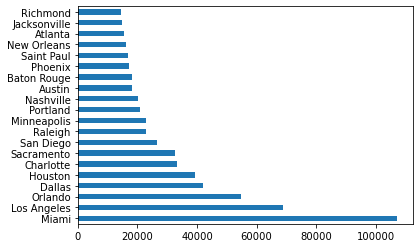

In [32]:
cities_by_accident[:20].plot(kind="barh")

In [34]:
sns.set_style("darkgrid")

C:\Users\ELNGGAR\anaconda3\envs\pandas_playground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

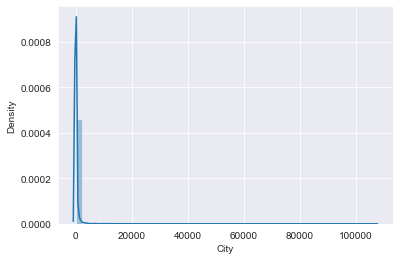

In [37]:
sns.distplot(cities_by_accident)

In [38]:
high_accident_cities = cities_by_accident[cities_by_accident>=1000]
low_accident_cities = cities_by_accident[cities_by_accident<1000] 

In [39]:
len(high_accident_cities)

496

In [40]:
len(low_accident_cities)

11185

In [41]:
len(high_accident_cities)/len(low_accident_cities)

0.04434510505140814

<AxesSubplot:xlabel='City', ylabel='Count'>

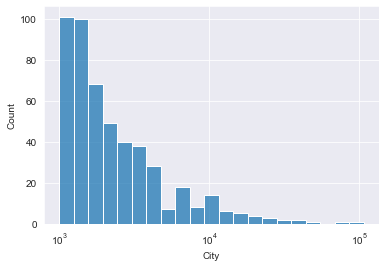

In [45]:
sns.histplot(high_accident_cities, log_scale=True)

<AxesSubplot:xlabel='City', ylabel='Count'>

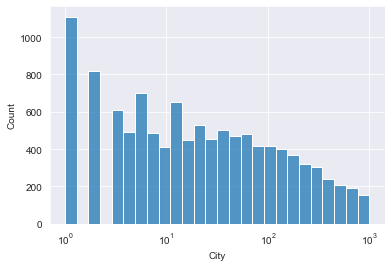

In [44]:
sns.histplot(low_accident_cities, log_scale=True)

In [50]:
df[['City', 'Start_Time', 'End_Time']] 

,City,Start_Time,End_Time
0,Dublin,2016-02-08 00:37:08,2016-02-08 06:37:08
1,Dayton,2016-02-08 05:56:20,2016-02-08 11:56:20
2,Cincinnati,2016-02-08 06:15:39,2016-02-08 12:15:39
3,Akron,2016-02-08 06:51:45,2016-02-08 12:51:45
4,Cincinnati,2016-02-08 07:53:43,2016-02-08 13:53:43
...,...,...,...
2845337,Riverside,2019-08-23 18:03:25,2019-08-23 18:32:01
2845338,San Diego,2019-08-23 19:11:30,2019-08-23 19:38:23
2845339,Orange,2019-08-23 19:00:21,2019-08-23 19:28:49
2845340,Culver City,2019-08-23 19:00:21,2019-08-23 19:29:42


In [11]:
df["Start_Time"]

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [12]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["Start_Time"]

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:51:45
4         2016-02-08 07:53:43
                  ...        
2845337   2019-08-23 18:03:25
2845338   2019-08-23 19:11:30
2845339   2019-08-23 19:00:21
2845340   2019-08-23 19:00:21
2845341   2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: datetime64[ns]

In [14]:
df["Start_Time"].dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

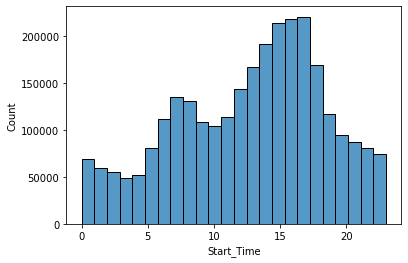

In [15]:
sns.histplot(df["Start_Time"].dt.hour, bins=24)

C:\Users\ELNGGAR\anaconda3\envs\pandas_playground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

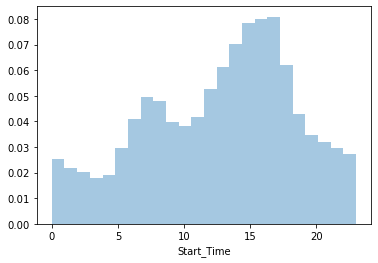

In [17]:
sns.distplot(df["Start_Time"].dt.hour, bins=24, kde=False, norm_hist=True)

<AxesSubplot:xlabel='Start_Time'>

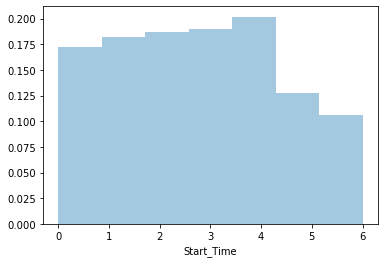

In [21]:
sns.distplot(df["Start_Time"].dt.dayofweek, bins=7, kde=False, norm_hist=True)

In [25]:
c = df["Start_Time"][df["Start_Time"].dt.dayofweek == 5]

<AxesSubplot:xlabel='Start_Time'>

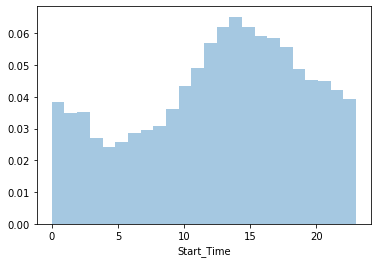

In [29]:
sns.distplot(c.dt.hour, bins=24, kde=False, norm_hist=True) # suterday

In [27]:
d = df["Start_Time"][df["Start_Time"].dt.dayofweek == 6]

<AxesSubplot:xlabel='Start_Time'>

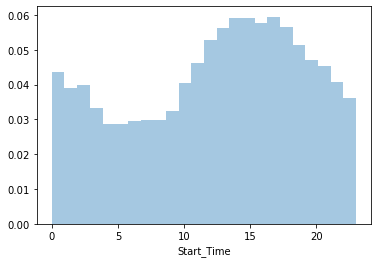

In [30]:
sns.distplot(d.dt.hour, bins=24, kde=False, norm_hist=True) #suday

<AxesSubplot:xlabel='Start_Time'>

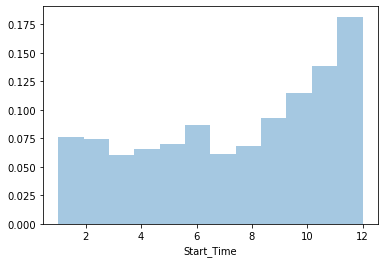

In [32]:
sns.distplot(df["Start_Time"].dt.month, bins=12, kde=False, norm_hist=True)

In [34]:
df_2020 = df[df["Start_Time"].dt.year == 2020]

C:\Users\ELNGGAR\anaconda3\envs\pandas_playground\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

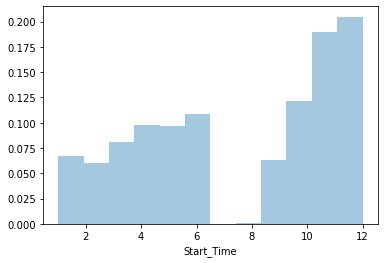

In [35]:
sns.distplot(df_2020["Start_Time"].dt.month, bins=12, kde=False, norm_hist=True)

In [36]:
df_2021 = df[df["Start_Time"].dt.year == 2021]

<AxesSubplot:xlabel='Start_Time'>

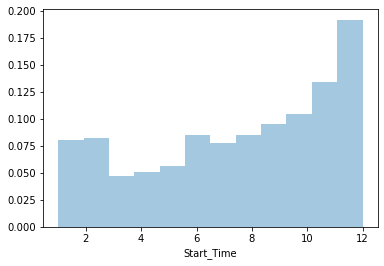

In [37]:
sns.distplot(df_2021["Start_Time"].dt.month, bins=12, kde=False, norm_hist=True)

In [48]:
sample_df = df.sample(int(0.1*len(df)))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

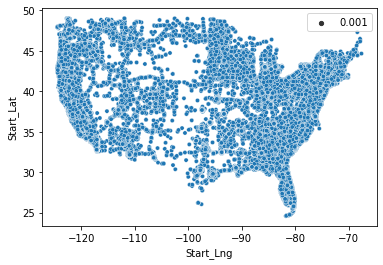

In [49]:
sns.scatterplot(x=sample_df['Start_Lng'], y=sample_df['Start_Lat'],size=0.001)

In [17]:
lat, lng = df['Start_Lat'][2], df['Start_Lng'][2]
lat, lng

(39.10266, -84.52468)

In [12]:
folium.Map()

In [19]:
map = folium.Map()

In [20]:
marker = folium.Marker((lat, lng))

In [21]:
marker.add_to(map)
map

In [28]:
for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x)

('Start_Lat', 299281     33.165584
115485     37.575070
1480729    28.486842
2333791    37.682417
1031728    45.123027
             ...    
2254910    43.943930
1572773    40.846088
1510297    39.419041
2169737    31.869660
2088991    45.029890
Name: Start_Lat, Length: 100, dtype: float64)
('Start_Lng', 299281     -87.544120
115485    -122.046900
1480729    -81.418264
2333791   -122.126156
1031728    -93.335777
              ...    
2254910    -94.879170
1572773   -121.911575
1510297    -76.635636
2169737   -106.440650
2088991    -92.962040
Name: Start_Lng, Length: 100, dtype: float64)


In [59]:
sample_df = df.sample(int(0.01*len(df)))

In [60]:
heat_data = list(zip(list(sample_df['Start_Lat']), list(sample_df['Start_Lng'])))
heat_data

[(34.04133, -118.06008),
 (37.37683, -77.41149),
 (32.698473, -96.823419),
 (30.403351, -87.339833),
 (36.11141, -80.23666999999998),
 (45.508672, -122.708357),
 (39.504529, -123.379715),
 (30.224861, -97.670031),
 (33.461383000000005, -112.117184),
 (39.669338, -75.600837),
 (32.279324, -110.989722),
 (35.616035, -119.331336),
 (35.2649, -81.260751),
 (41.5781, -87.64711),
 (37.145294, -122.335454),
 (42.85313, -78.864195),
 (43.97438, -124.097119),
 (32.804145, -97.42602),
 (40.137103, -74.224518),
 (37.42093, -122.09254),
 (44.351183, -93.952369),
 (42.33469, -71.06506),
 (46.413285, -112.008216),
 (30.271491, -97.77327),
 (36.89201, -76.258),
 (32.792965, -96.777948),
 (29.86013, -95.56378),
 (36.720453000000006, -121.593522),
 (32.97972, -117.086859),
 (41.632765, -93.575223),
 (42.4688, -82.91919),
 (41.98258, -83.371044),
 (42.35494, -83.4362),
 (38.833955, -77.11911500000002),
 (43.17929, -77.64448),
 (34.15181, -118.12622),
 (35.835224, -78.67008),
 (39.165512, -119.929805),
 

In [58]:
map = folium.Map()
HeatMap(heat_data).add_to(map)
map

In [18]:
# no data from NY state
# less than 5% of cities have more than 1000 yearly accidents
# about 1110 cities reported only one accident (in need of investigating how accurate the data are )
# most crowded time from 3am to 8pm 
# throughout the week except suterday and sunday, accidents are very high "almost 200% increase" compared to suterday and sunday